# Grade: /100 Mark(s)

# Assignment 02: Maximum Likelihood


### Maximum Likelihood

The poisson distribution https://en.wikipedia.org/wiki/Poisson_distribution is a discrete probability distribution often used to describe count-based data, like how many snowflakes fall in a day.

If we have count data $y$ that are influenced by a covariate or feature $x$, we can used the maximum likelihood principle to develop a regression model that estimates the mean of $Y$ given $X = x$.

### Follow These Instructions

Once you are finished, ensure to complete the following steps.

1.  Restart your kernel by clicking 'Kernel' > 'Restart & Run All'.

2.  Fix any errors which result from this.

3.  Repeat steps 1. and 2. until your notebook runs without errors.

4.  Submit your completed notebook to OWL by the deadline.


In [18]:
#Packages for this assignment
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import minimize
from scipy.special import gammaln
from sklearn import linear_model
from IPython.display import display

from sklearn.linear_model import LinearRegression

### Question 1: /10 Marks

The negative log likelihood for one observation of a single Poisson random variable is

$$\ell(\lambda; y) = -\Bigg(   y\cdot \ln(\lambda) - \lambda - \ln(y) \Bigg)$$

The negative log likelihood for a collection of $N$ observations, assuming each is independent and Poisson with the same parameter $\lambda$, is

$$\ell(\lambda; \mathbf{y}) = -\sum_{i=1}^N\Bigg(   y_{i}\cdot \ln(\lambda) - \lambda - \ln(y_i!) \Bigg)$$

The negative log likelihood for a collection of $N$ observations, assuming each is independent and Poisson with a *different* parameter $\lambda$ for each one, is

$$\ell(\boldsymbol{\lambda}; \mathbf{y}) = -\sum_{i=1}^N\Bigg(   y_{i}\cdot \ln(\lambda_i) - \lambda_i - \ln(y_i!) \Bigg)$$

See the difference?

Write a function called `poissonNegLogLikelihood` that takes a vector of counts $\mathbf{y}$ and a parameter $\lambda$ and returns the negative log likelihood. Use numpy functions so that you don't need to use loops. Also, note that the $\sum_{i} \ln(y!)$ term does not affect the location of the maximum because it does not change with $\lambda$, and so you can (and should) omit the $ \ln(y!)$ in your function.

Your code should work for two cases:

First, it should work with a scalar $\lambda$ and a vector $y$. Test your function by calling it with `lam = 1.3` and `y=np.array([2,1,0,0])`.

Second, it should work with a vector $\lambda$ and a vector $y$, if they have the same length. (This is the last likelihood function described above.) Test your function by calling it with `lam=np.array([1,0.5,1,3])` and  `y=np.array([2,1,0,0])`. In this second case, the first $\lambda$ should be used to evaluate the first $y$, the second $\lambda$ should be used to evaluat the second $y$, and so on. ***YOU SHOULD NOT USE ANY LOOPS - BOTH CASES SHOULD WORK IF YOU CODE IT IN THE SIMPLEST WAY BECAUSE OF HOW NUMPY WORKS.**

**Answer the following below in markdown:** What happens when you set an element of lam to 0 or a negative number and why? 


#### Answer to Question 1

What I set an element of lam to 0 or a negative number, there are two errors respectively:

1. RuntimeWarning: divide by zero encountered in log
2. RuntimeWarning: invalid value encountered in log

Both log(0) and log(negative value) are not defined because the domain of log is positive real numbers.

In [7]:
def poissonNegLogLikelihood(lam,y):
    # calculate negative log likelihood for Poisson random variable
    neg_log_lik = -1 * np.sum(y * np.log(lam) - lam)
    return neg_log_lik

lam = 1.3
y = np.array([2, 1, 0, 0])
neg_log_lik_1 = poissonNegLogLikelihood(lam=lam, y=y)
print('Case 1: {}'.format(neg_log_lik_1))

lam = np.array([1, 0.5, 1, 3])
y = np.array([2, 1, 0, 0])
neg_log_lik_2 = poissonNegLogLikelihood(lam=lam, y=y)
print('Case 2: {}'.format(neg_log_lik_2))

Case 1: 4.412907206597527
Case 2: 6.193147180559945


---

### Question 2: /15 Marks

Write a function called `poissonRegressionNegLogLikelihood` that takes as arguments a vector $\mathbf{y}$ of counts, a design matrix $\mathbf{X}$ of features for each count, and a vector $\mathbf{\beta}$ of parameters. The function should return the negative log likelihood of this dataset, assuming that each element of  $\mathbf{y}$ is independent and Poisson distributed with parameter $\lambda = \exp(\mathbf{X}\beta)$. Hint: Numpy implements the exponential using `np.exp`.

Hint: You should use `poissonNegLogLikelihood` in this answer!
Test your function by calling it with 
* `b=np.array([1,2])`
* `X=np.array([[1,2,3],[2,3,1]]).T`
* `y=np.array([0,2,10])`


In [8]:
def poissonRegressionNegLogLikelihood(b, X, y):
    #Enter the expression for lambda as shown above!
    lam = np.exp(-1 * np.dot(X, b.T))
    # Use poissonNegLogLikelihood to compute the likelihood
    neg_log_lik = poissonNegLogLikelihood(lam=lam, y=y)
    return neg_log_lik

b = np.array([1, 2])
X = np.array([[1, 2, 3], [2, 3, 1]]).T
y = np.array([0, 2, 10])

neg_log_lik_3 = poissonRegressionNegLogLikelihood(b=b, X=X, y=y)
print('Negative log likelihood of the dataset: {}'.format(neg_log_lik_3))

Negative log likelihood of the dataset: 66.01381135662608


### Question 3: /10 Marks

a) In `poissonRegressionNegLogLikelihood`, why did we apply the exponential function to $\mathbf{X}\beta$?  Hint: Can an exponential ever be negative?

b) What might have happened had we just passed $\lambda = \mathbf{X}\beta$?

Answer parts a) and b) below in this cell.  Write no more than 2 sentences per answer! 

---


a) Since an exponential can never be negative, applying that to $\mathbf{X}\beta$ allows for the lamba to be unaffected by the possibility of becoming zero or negative value. So the log function in the negative likelihood will always be positive.

b) If we just passed $\lambda = \mathbf{X}\beta$, the lamba could become zero or negative meaning that it will be invalid in the log function of the negative likelihood.


### Question 4: /5 Marks

Write a function called `modelPrediction` which accepts as its first argument a vector of coefficents $\beta$ and a design matrix $\mathbf{X}$.  The function should return predictions of the form $\widehat{\mathbf{y}} = \exp(\mathbf{X}\beta)$. 

Hint: Numpy implements the exponential using `np.exp`.  

Test your function by calling it with 
* `b=np.array([1,2])`
* `X=np.array([[1,2,3],[2,3,1]]).T`

In [9]:
def modelPrediction(b,X):
    yhat = np.exp(np.dot(X, b.T))
    return yhat

b = np.array([1, 2])
X = np.array([[1, 2, 3], [2, 3, 1]]).T
print(modelPrediction(b=b, X=X))

[ 148.4131591  2980.95798704  148.4131591 ]


### Question 5: /15 Marks

Write a function called `fitModel` which accepts as its first argument argument a design matrix $\mathbf{X}$ and as its second argument a vector of outcomes counts $\mathbf{y}$. The function should return the maximum likelihood estimates for the coefficients of a Poisson regression of $\mathbf{y}$ onto $\mathbf{X}$.

Test your function by calling it with 
* `X=np.array([[1,2,3],[2,3,1]]).T`
* `y=np.array([0,2,10])`

What is your estimated b? 

In [15]:
def fitModel(X,y):

    # Instantiate a guess for the betas, beta_start, so that the optimizer has somewhere to start
    # Keep in mind what shape the beta_start should be. It shoud have the same number of elements as X as columns
    beta_start = np.zeros(shape=X.shape[1])
    # Minimize the appropriate likelihood function
    mle = minimize(fun=poissonRegressionNegLogLikelihood, x0=beta_start, args=(X, y), method="powell")
    # Extract the maximum likelihood estimates from the optimizer.
    betas = mle.x
    return betas

# Write code to show your estimated b.
X = np.array([[1, 2, 3], [2, 3, 1]]).T
y = np.array([0, 2, 10])
estimated_b = fitModel(X=X, y=y)
print('Estimated b: {}'.format(estimated_b))

Estimated b: [-0.94820003  0.52914552]


### Question 6: /20 Mark(s)

Load in the data from `poisson_regression_data.csv`. Plot a scatterplot of the data. Fit a poisson regression to this data using the functions you wrote above.  Plot the model predictions over $x \in [-2,2]$ on the same graph as the scatterplot of the data.  

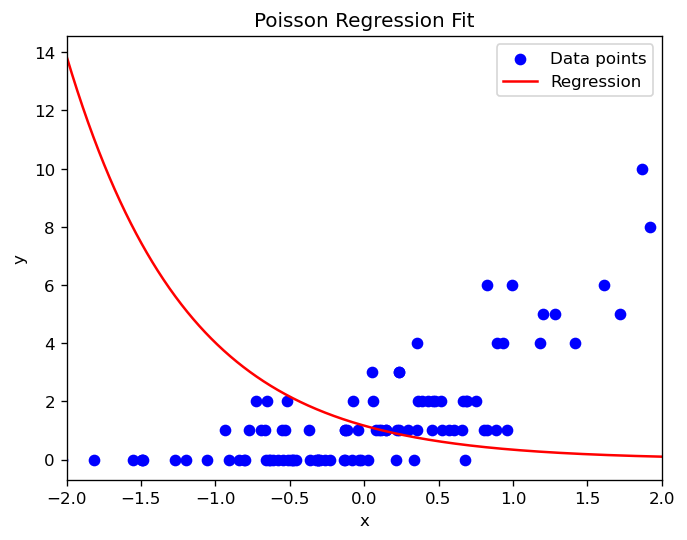

In [24]:
# Loading in the data.  
df = pd.read_csv('poisson_regression_data.csv')

fig, ax = plt.subplots(dpi = 120)

# Scatterplot the data. 
plt.scatter(df['x'], df['y'], c='b', label='Data points')

# Fit the model.  Use your functions.  
x = df.x.values 
X = np.vstack([np.ones(len(x)), x]).T
y= df.y.values

# Find the maximum likelihood estimates for the coefficients for this data
betas = fitModel(X=X, y=y)

# Make predictions on new data
newx = np.linspace(-2,2,1001)
newX = np.vstack([np.ones(len(newx)), newx]).T

# Make predictions on the new data
y_predicted = modelPrediction(b=betas, X=newX)

#Finally, plot the predictions on the same axis and color the predictions red
plt.plot(newx, y_predicted, c='r', label='Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-2, 2)
plt.legend()
plt.title('Poisson Regression Fit')
plt.show()

### Question 7:  /20 Marks

Now apply linear regression (ordinary least squares) to the data, obtain parameter estimates and and plot the predictions over the same range.


Intercept: 1.3949803691230633, Coefficient: 1.6953232139271825


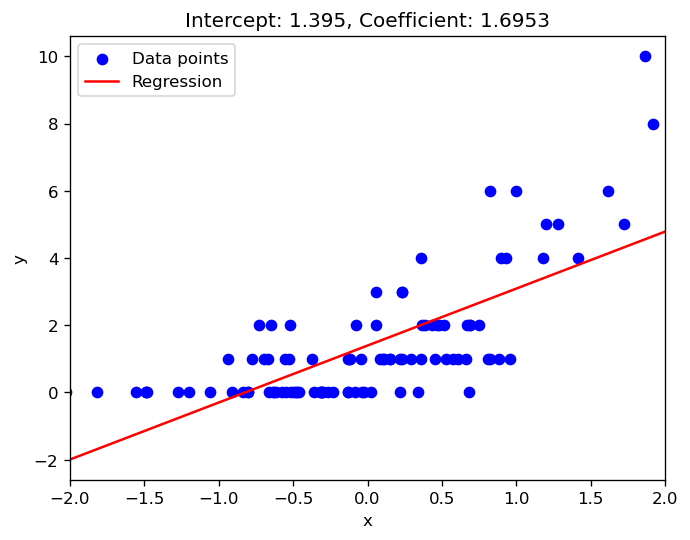

In [25]:
# Hint: Very similar to the previous assignment
# Read in the data
df = pd.read_csv('poisson_regression_data.csv')

# fit the model
ols_fit = df['x'].to_numpy().reshape((-1, 1))
# linear regression
reg = LinearRegression().fit(X=ols_fit, y=df['y'])
intercept_b = reg.intercept_
coefficients_b = reg.coef_[0]
print('Intercept: {}, Coefficient: {}'.format(intercept_b, coefficients_b))

# Make predictions over the range -2 to 2
X_fig = np.linspace(start=-2, stop=2, num=100)
X_fig_reshape = X_fig.reshape((-1, 1))
y_fig = reg.predict(X_fig_reshape)

# Plot a scatter plot of the data and your model's predictions
fig, ax = plt.subplots(dpi = 120)
plt.scatter(df['x'].to_numpy(), df['y'].to_numpy(), c='b', label='Data points')
plt.plot(X_fig, y_fig, c='r', label='Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-2, 2)
plt.legend()
plt.title('Intercept: {}, Coefficient: {}'.format(intercept_b.round(4), coefficients_b.round(4)))
plt.show()

### Question 8: /5 Mark(s)

Do you see any major problems with the predictions from linear regression? Keep in mind that this model is intended to model counts of things.  Provide your answer below in markdown in fewer than 5 sentences. 

#### Answer

Yes, there are major problems with using linear regression for modeling count data. Linear regression predicts continuous values, which can result in negative predictions (evident from the graph from question 7), an issue not suitable for count data that can only be zero or positive. Additionally, count data often exhibit overdispersion (variance greater than the mean), which linear regression does not account for, leading to potentially misleading predictions. A Poisson regression model, which is specifically designed for count data, would be more appropriate as it constrains predictions to be non-negative and accounts for the distribution's characteristics.

### Follow These Instructions

Once you are finished, ensure to complete the following steps.

1.  Restart your kernel by clicking 'Kernel' > 'Restart & Run All'.

2.  Fix any errors which result from this.

3.  Repeat steps 1. and 2. until your notebook runs without errors.

4.  Submit your completed notebook to OWL by the deadline.